Version 1.0.2

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [57]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [58]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [59]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [60]:
# YOUR CODE GOES HERE
transactions.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0
2,05.01.2013,0,25,2552,899.0,-1.0


In [61]:
items.head(3)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40


In [62]:
item_categories.head(3)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2


In [63]:
shops.head(3)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. **What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [64]:
from datetime import datetime

In [65]:
# Convert type of column "date", object --> datetime
transactions.date = pd.to_datetime(transactions.date, format='%d.%m.%Y')

In [66]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              datetime64[ns]
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [67]:
df_sept14 = transactions[(transactions.date.dt.year == 2014) & (transactions.date.dt.month == 9)]

In [68]:
df_sept14.loc[:, 'rev'] = df_sept14.item_price * df_sept14.item_cnt_day

/home/kaml/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/kaml/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [69]:
df_rev = df_sept14.groupby('shop_id').rev.sum()

In [70]:
df_rev.head(3)

shop_id
2    1473540.0
3    1228425.0
4    1211556.0
Name: rev, dtype: float64

In [71]:
max_rev = df_rev.max()

In [72]:
max_rev

7982852.199999956

In [73]:
max_revenue = max_rev
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.199999956


## ------------------------------ Question 2 -----------------------------------

Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [74]:
# Create a new datarame slicing the summer months (6, 7, 8) 0f 2014
df_summer14 = transactions[(transactions.date.dt.year == 2014) & ((transactions.date.dt.month == 6) | (transactions.date.dt.month == 7) | (transactions.date.dt.month == 8)) ]

In [75]:
# Adding the revenue column (item_price * item_cnt_day)
df_summer14.loc[:, 'rev'] = df_summer14['item_cnt_day'] * df_summer14['item_price']

In [76]:
merged_df = df_summer14.merge(items, on='item_id')

In [77]:
merged_df.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,rev,item_name,item_category_id
0,2014-06-15,17,26,9532,399.0,1.0,399.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
1,2014-06-03,17,26,9532,399.0,1.0,399.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
2,2014-06-08,17,26,9532,399.0,1.0,399.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30


In [78]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247782 entries, 0 to 247781
Data columns (total 9 columns):
date                247782 non-null datetime64[ns]
date_block_num      247782 non-null int64
shop_id             247782 non-null int64
item_id             247782 non-null int64
item_price          247782 non-null float64
item_cnt_day        247782 non-null float64
rev                 247782 non-null float64
item_name           247782 non-null object
item_category_id    247782 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 18.9+ MB


In [79]:
ici_df = merged_df.loc[:, ['item_category_id', 'rev']].groupby('item_category_id').rev.sum()

In [80]:
ici_df.idxmax()

20

In [81]:
category_id_with_max_revenue = ici_df.idxmax()
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


# ------------------------ Question 3 ------------------------

<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [82]:
transactions.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.0,1.0
1,2013-01-03,0,25,2552,899.0,1.0
2,2013-01-05,0,25,2552,899.0,-1.0


In [83]:
id_price_df = transactions.groupby(['item_id', 'item_price']).size().reset_index().rename(columns={0:'count'})

In [84]:
id_price_df.item_id.value_counts().tail(5927)

21152    2
1277     1
1086     1
4852     1
7676     1
        ..
1262     1
5356     1
16474    1
146      1
0        1
Name: item_id, Length: 5927, dtype: int64

In [85]:
# YOUR CODE GOES HERE

num_items_constant_price = 5926 # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

# ----------------------- Question 4 -------------------------

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [86]:
transactions.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.0,1.0
1,2013-01-03,0,25,2552,899.0,1.0


In [123]:
dec14_df = transactions[(transactions.date.dt.year == 2014) & (transactions.date.dt.month == 12) & (transactions.shop_id == 25)]
items_per_day_df = dec14_df.groupby('date').item_cnt_day.sum().reset_index().rename(columns={0: 'items_per_day'})
items_per_day_df.head(3)

,date,item_cnt_day
0,2014-12-01,153.0
1,2014-12-02,169.0
2,2014-12-03,195.0


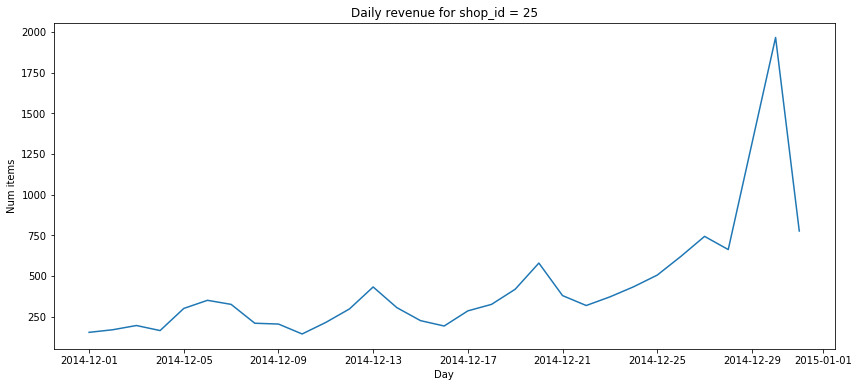

Current answer for task total_num_items_sold_var is: 117167.70229885059


In [130]:
shop_id = 25

total_num_items_sold = items_per_day_df.item_cnt_day
days = items_per_day_df.date

# Plot it
plt.figure(figsize=(14,6))
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = total_num_items_sold.var()
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [133]:
STUDENT_EMAIL = 'spartalis@gmx.com'
STUDENT_TOKEN = 'guebTS3AoUjtVfyF'
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.199999956
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.70229885059


In [134]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)